In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [35]:
# Read files to pandas dataframes
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')
sample_submission = pd.read_csv('data/SampleSubmission.csv')

In [36]:
special = ["Sample_ID", "Label"]
original_columns = list(set(train.columns) - set(special))

In [38]:
import baseline
reload(baseline)
X, y = baseline.originalXy()
X

,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif
0,130,129,127,126,123,126,125,124,122,119,122,121,119,117,115,119,117,115,114,112,116,114,113,111,110,35.26439,37.29208,33.85452,35.79576,40.31554,38.87666,39.50971,40.51059,45.83452,45.00000,36.05503,40.51059,44.56372,41.81031,38.87666,33.85452,38.87666,33.85452,33.85452,32.63194,32.63194,30.24626,30.24626,30.24626,30.24626,98.1301,113.1986,116.5650,123.6901,135.0000,97.12502,104.0362,110.5560,119.0546,126.8699,105.9454,110.5560,113.9625,116.5650,119.7449,116.5650,119.7449,116.5650,116.5650,128.6598,128.6598,120.9638,120.9638,120.9638,120.9638,0.038514,0.029463,0.031405,0.025771,0.010453,0.028321,0.027360,0.019831,0.009338,0.008806,0.021451,0.021244,0.017273,0.006708,-0.008671,0.023851,0.012586,-0.004249,0.003646,-0.006809,0.013328,0.005337,0.007039,-0.017753,-0.007777,0.013903,0.014674,0.018249,0.018368,0.003341,0.002023,0.005743,0.002238,-0.003820,-0.003302,-0.002141,0.003585,0.002025,-0.012269,-0.027184,0.000977,-0.012630,-0.031644,-0.025683,-0.037371,-0.018934,-0.021875,-0.023553,-0.048495,-0.039092,8.045186,8.333038,7.819405,8.032228,9.818933,9.295772,9.375107,9.499450,10.922910,11.001900,9.339861,9.883230,11.035840,10.298030,9.618946,8.703197,10.175750,8.651121,8.251134,8.074524,8.519887,7.989215,7.634287,7.804186,7.219216,3.173340,2.961406,3.315935,3.061250,3.246914,3.221661,3.153512,3.048637,2.915506,3.073973,3.765278,3.246664,3.154479,3.237765,3.392537,3.851345,3.673898,3.821337,3.584646,3.734637,4.003083,4.218082,3.990867,4.100921,3.715154,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1.281767,1.281743,1.281708,1.281684,1.281649,1.281780,1.281757,1.281721,1.281698,1.281662,1.281789,1.281765,1.281730,1.281707,1.281671,1.281802,1.281779,1.281743,1.281720,1.281684,1.281811,1.281788,1.281752,1.281729,1.281693
1,161

In [4]:
train.describe()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
count,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,1086

In [5]:
uniq = set(map(lambda s: s.split('_')[1] if '_' in s and not s in special else s, list(train.columns)))
uniq -=  set(special)
uniq = list(uniq)
", ".join(uniq)

'sdoif, elevation, procurv, placurv, lsfactor, slope, twi, aspect, geology'

In [6]:
desc = {}
desc["elevation"] = "Digital elevation of the terrain surface in meter"
desc["slope"] = "Angle of the slope inclination in degree"
desc["aspect"] = "Exposition of the slope in degree"
desc["placurv"] = "Planform curvature, curvature perpendicular to the direction of the maximum slope"
desc["procurv"] = "Profile curvature, curvature parallel to the slope, indicating the direction of maximum slope"
desc["lsfactor"] = "Length-slope factor that accounts for the effects of topography on erosion"
desc["twi"] = "Topographic wetness index, an index to quantify the topographic control on hydrological process"
desc["geology"] = {
    1: "Weathered Cretaceous granitic rocks",
    2: "Weathered Jurassic granite rocks",
    3: "Weathered Jurassic tuff and lava",
    4: "Weathered Cretaceous tuff and lava",
    5: "Quaternary deposits",
    6: "Fill",
    7: "Weathered Jurassic sandstone, siltstone and mudstone"
}
desc["sdoif"] = "Step duration orographic intensification factor: an index to quantify the amplification of orography on rainfall"

In [7]:
squares = pd.DataFrame()
for i in range(25):
    mycols = list(map(lambda col: f"{i+1}_{col}", uniq))
    squares = squares.append(train[mycols + special].rename(dict(zip(mycols, uniq)), axis=1))
squares

,sdoif,elevation,procurv,placurv,lsfactor,slope,twi,aspect,geology,Sample_ID,Label
0,1.281767,130,0.013903,0.038514,8.045186,35.26439,3.173340,98.1301,3,1,0
1,1.359568,161,-0.012546,0.007030,9.089893,32.31153,4.396348,198.4350,3,2,1
2,1.365062,149,-0.015857,0.007581,12.115220,42.67464,3.912020,310.6013,2,3,0
3,1.100921,80,0.018884,0.033529,3.416162,19.82703,3.021531,213.6901,2,4,0
4,1.284558,117,-0.000098,0.005615,7.740312,32.63194,3.523277,128.6598,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...
10859,1.272048,192,-0.028007,-0.007938,0.922690,17.54840,5.979714,108.4350,2,10860,0
10860,1.331126,418,0.004467,0.020360,5.760761,26.56505,3.510076,180.0000,3,10861,1
10861,1.298311,323,-0.017149,-0.024226,12.188480,40.31554,4.327808,135.0000,3,10862,1
10862,1.355067,103,0.030222,0.038743,6.825168,32.31153,2.963617,251.5650,2,10863,0


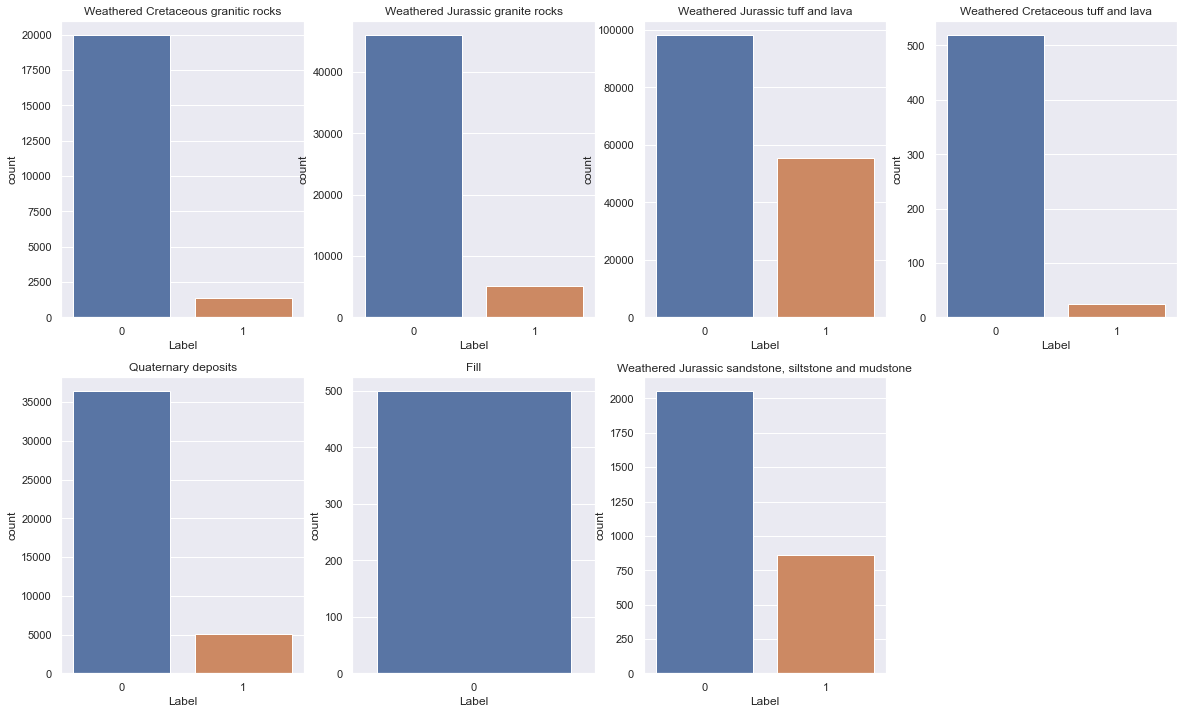

In [8]:
plt.figure(figsize=(20, 12))
for i in range(1, 8):
    plt.subplot(2, 4, i)
    sns.countplot(x= squares[squares["geology"] == i].Label)
    plt.title(desc["geology"][i])

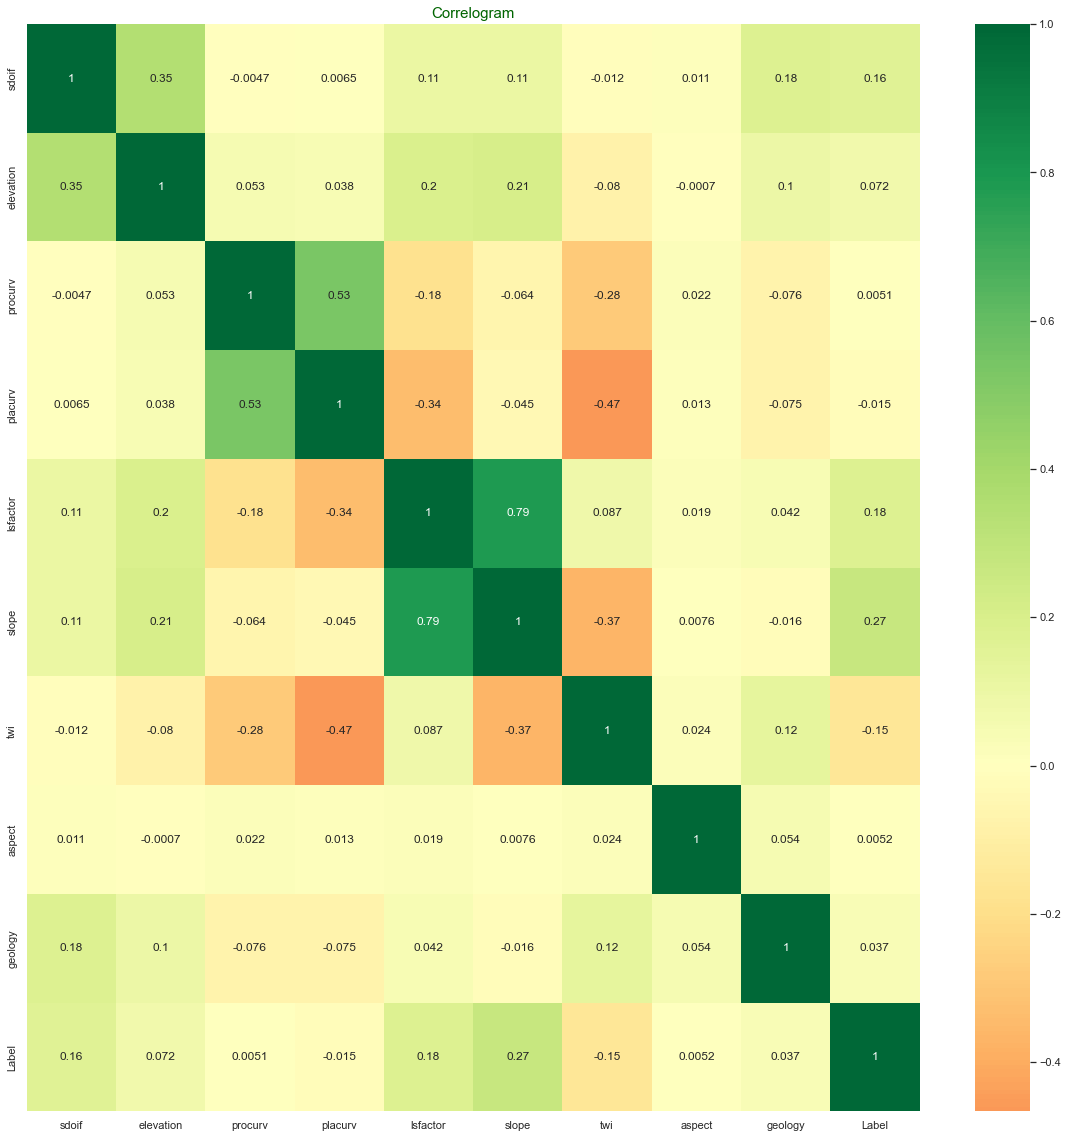

In [9]:
corr = squares.drop(["Sample_ID"], axis=1).corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

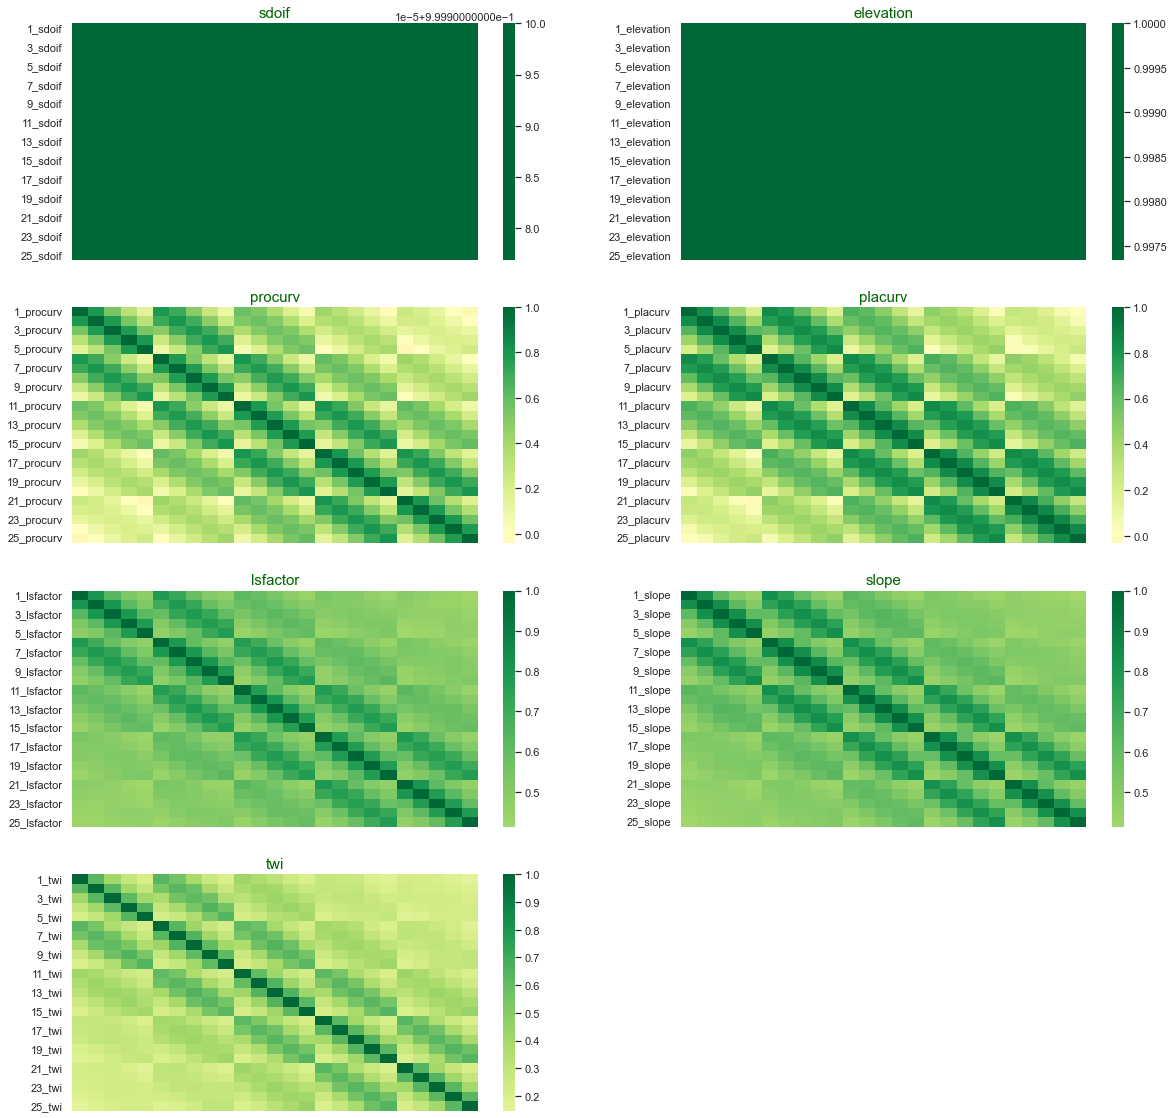

In [10]:
from dfcols import all_square_cols
plt.figure(figsize=(20, 20))
for i in range(7):
    plt.subplot(4, 2, i+1)
    corr = train[all_square_cols(uniq[i])].corr()
    sns.heatmap(corr, cmap='RdYlGn', center = 0)
    plt.title(uniq[i], fontsize = 15, color = 'darkgreen')
    plt.xticks([])

In [11]:
np.array(squares["geology"] == 6, dtype=int).sum()

500

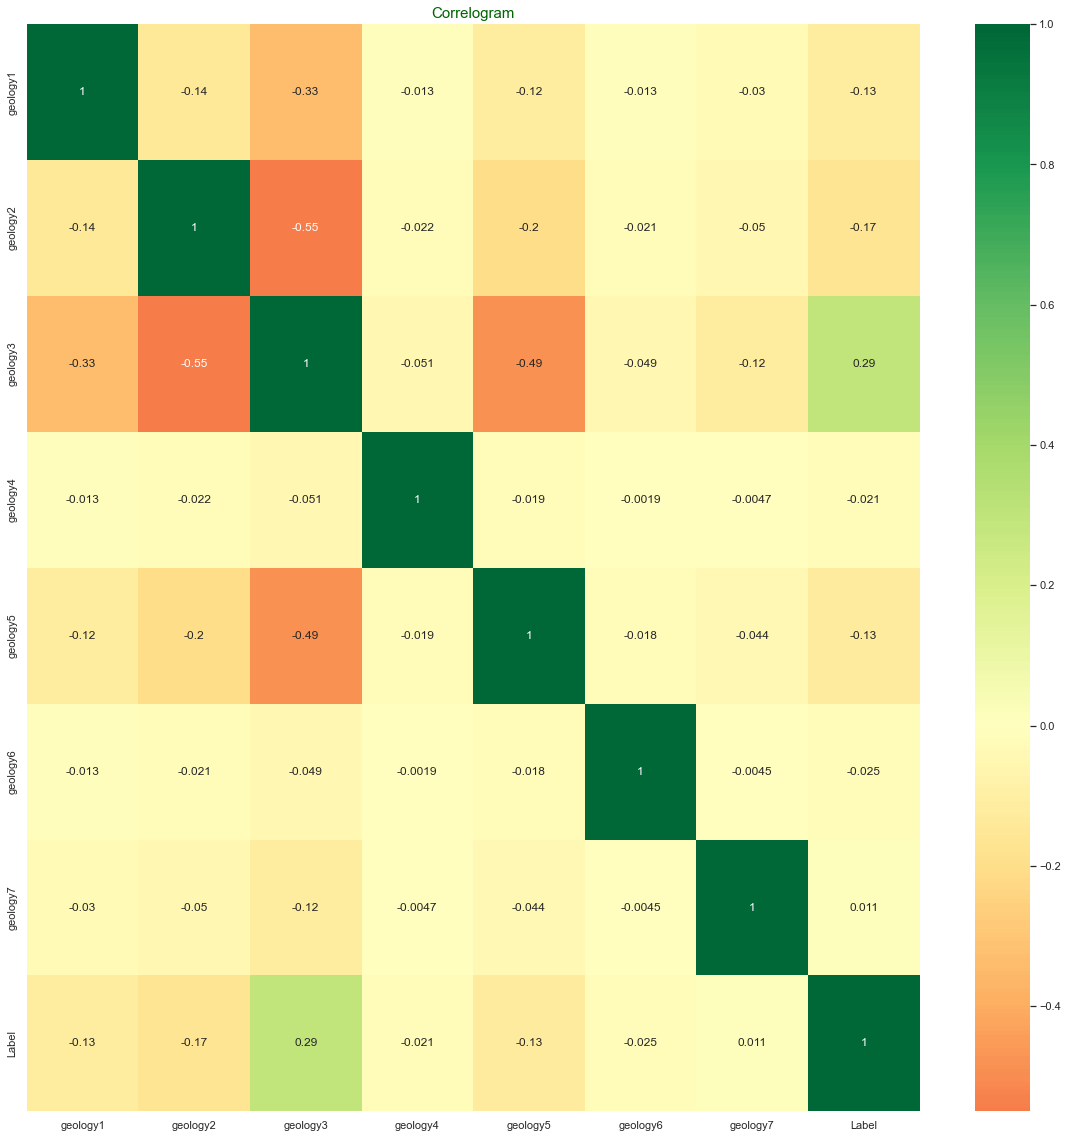

In [13]:
from finn.feat_trans import one_hot
for i in range(7):
    squares[f"geology{i+1}"] = one_hot(squares, "geology", i+1)

geos = [f"geology{i+1}" for i in range(7)]
corr = squares[geos + ["Label"]].corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [59]:
import finn.feat_trans as feat_trans
train["geology"] = feat_trans.most_frequent(train, "geology")
train["geology"].unique()

array([3, 2, 5, 1, 7, 4, 6])

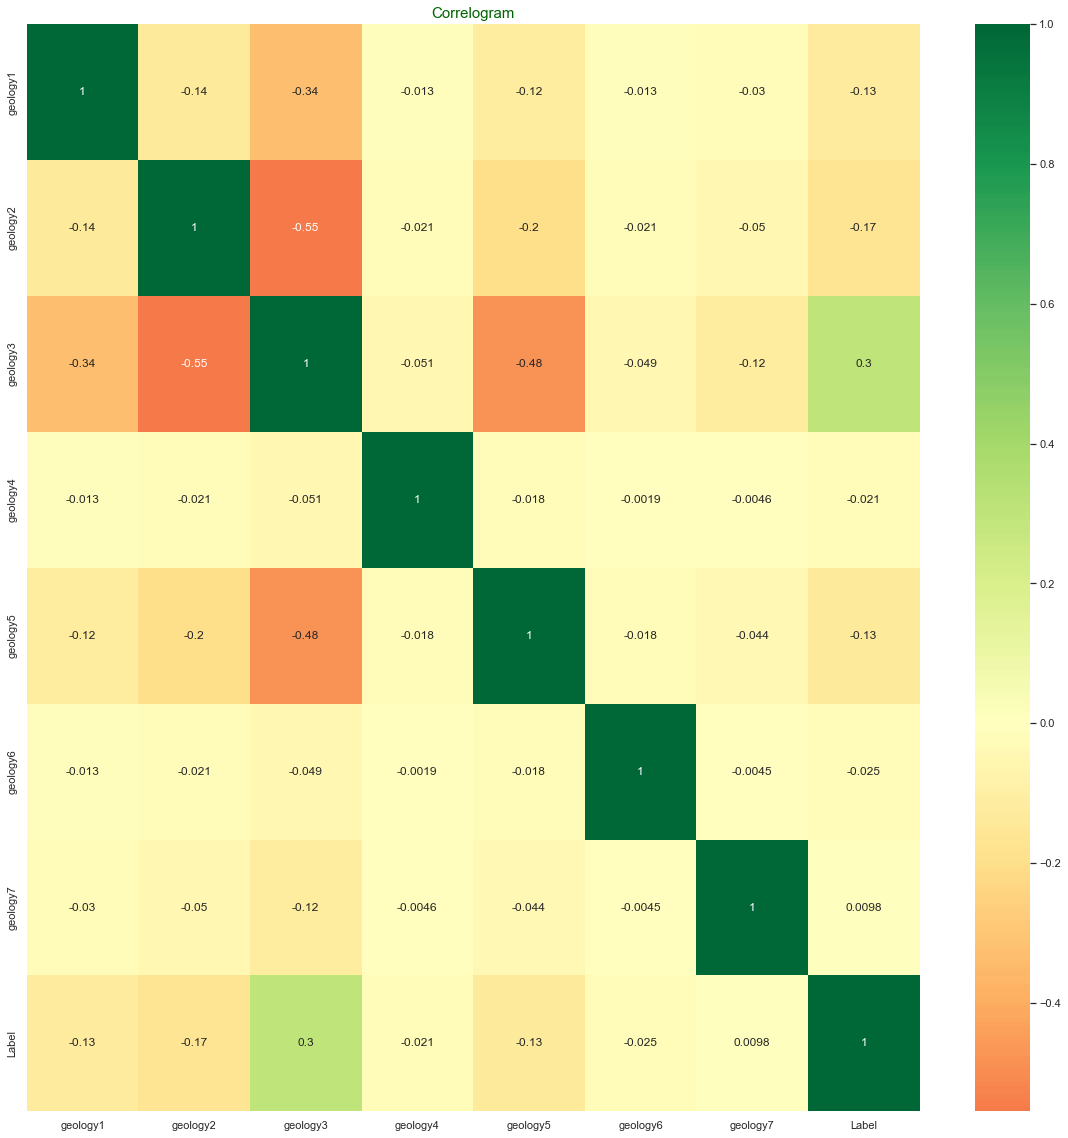

In [60]:
for i in range(7):
    train[f"geology{i+1}"] = one_hot(train, "geology", i+1)

corr = train[[f"geology{i+1}" for i in range(7)] + ["Label"]].corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [18]:
cont = list(set(uniq) - set(["geology"]))
", ".join(cont)

'sdoif, elevation, aspect, procurv, placurv, slope, twi, lsfactor'

In [41]:
for col in cont:
    train[f"{col}_mean"] = feat_trans.mean(train, col)
    train[f"{col}_std"] = feat_trans.std(train, col)

In [20]:
means = [f"{col}_mean" for col in cont]
stds = [f"{col}_std" for col in cont]

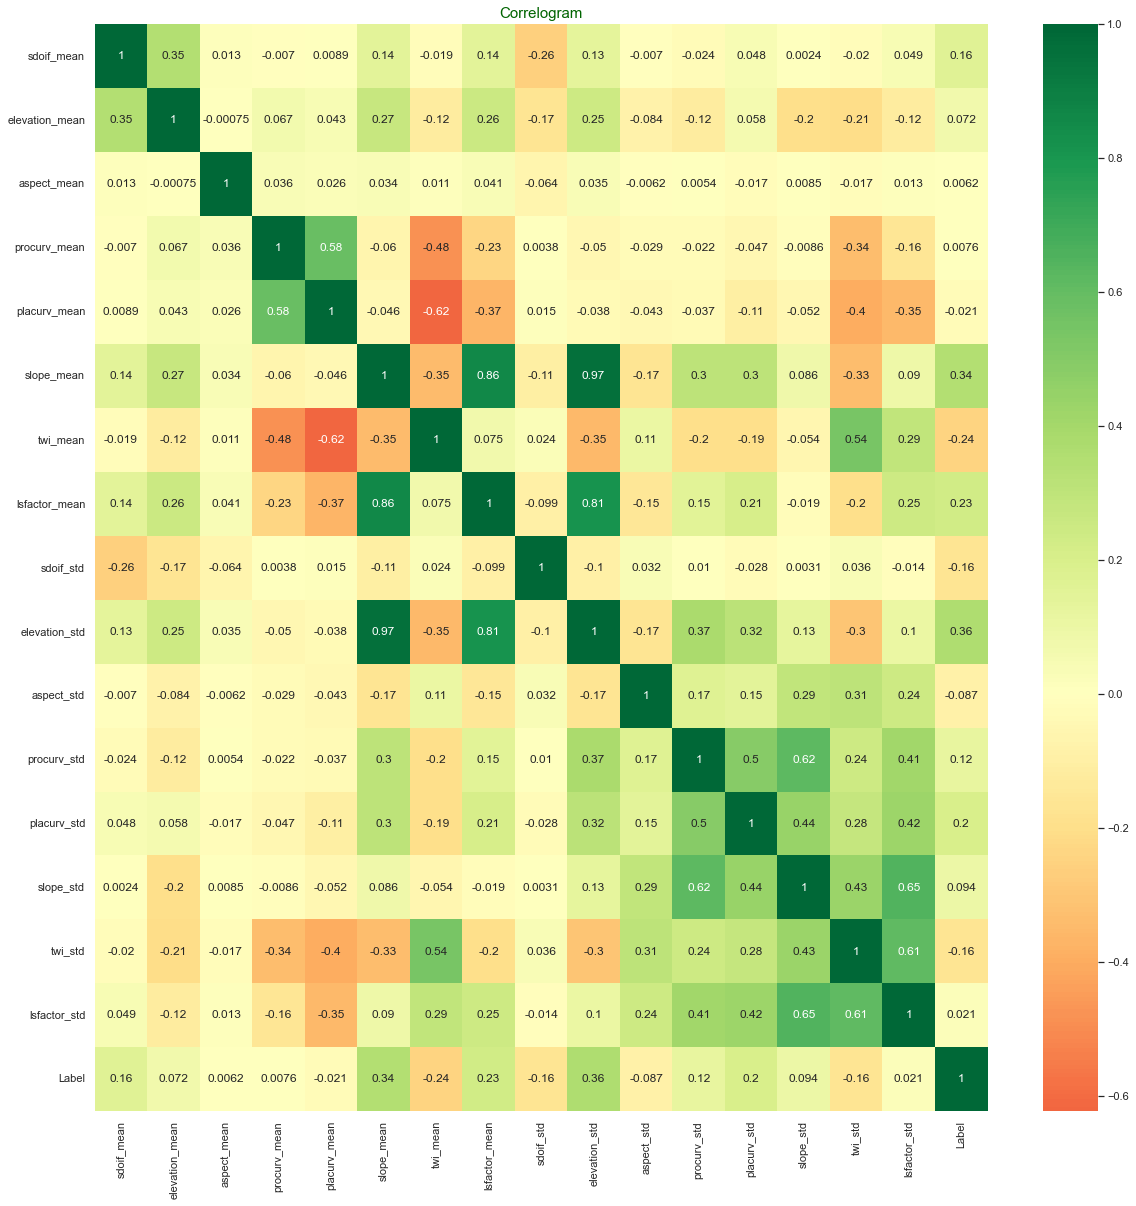

In [21]:
corr = train[means + stds + ["Label"]].corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [22]:
train[means + stds].describe()

,sdoif_mean,elevation_mean,aspect_mean,procurv_mean,placurv_mean,slope_mean,twi_mean,lsfactor_mean,sdoif_std,elevation_std,aspect_std,procurv_std,placurv_std,slope_std,twi_std,lsfactor_std
count,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000
mean,1.301057,224.834183,187.413859,-0.000184,0.000554,28.254034,4.540098,7.693782,0.000099,3.950607,37.149141,0.013046,0.015260,5.491054,0.931792,2.027241
std,0.051894,158.261783,84.567059,0.014013,0.018118,7.549079,0.991463,2.855506,0.000087,1.425675,42.375016,0.007913,0.008031,2.645571,0.790937,1.184415
min,1.092452,2.960000,11.884689,-0.077813,-0.082686,6.547674,2.299132,0.001403,0.000005,0.692820,1.593168,0.000045,0.000054,0.242184,0.101251,0.001152
25%,1.286432,101.430000,116.528060,-0.007712,-0.010534,23.094402,3.810877,5.723727,0.000048,2.959865,11.365407,0.007837,0.009423,3.555463,0.402875,1.247696
50%,1.308126,191.280000,184.062198,-0.000506,0.000792,28.300718,4.373911,7.546701,0.000062,3.844164,17.790866,0.010764,0.013280,4.844952,0.629487,1.725479
75%,1.331631,311.320000,259.891378,0.007246,0.012297,33.302306,5.138590,9.475817,0.000141,4.789655,37.406930,0.015636,0.019089,6.790685,1.153105,2.440486
max,1.370632,911.360000,357.238504,0.115547,0.094629,60.894232,11.979647,24.131212,0.001852,15.503600,174.683842,0.087726,0.085922,18.803736,6.320540,14.687505


In [23]:
normed_cols = []
for col in original_columns:
    normed_cols.append(f"{col}_norm")
    train[f"{col}_norm"] = feat_trans.normalize(train, col)

In [24]:
y = train["Label"]
X1 = train[original_columns].to_numpy()
X2 = train[means + stds + geos].to_numpy()
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(X1, y)
X3 = ss.transform(X1)
X4 = train[normed_cols].to_numpy()
ss = StandardScaler().fit(X2, y)
X5 = ss.transform(X2)

In [25]:
from importlib import reload
reload(feat_trans)

<module 'finn.feat_trans' from '/Users/finn/me/dev/2022/start/startHack/finn/feat_trans.py'>

In [26]:
for i, X in enumerate([X3, X4, X5]):
    f1 = feat_trans.test_feats_svc(X, y)
    print(f1)

0.6739600202925358
0.633029005897709
0.6437975150360087


In [27]:
len(means + stds + geos)
len(original_columns)

225

In [128]:
import imblearn
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X3, y)
feat_trans.test_feats_svc(X, y)

0.7619743187137392

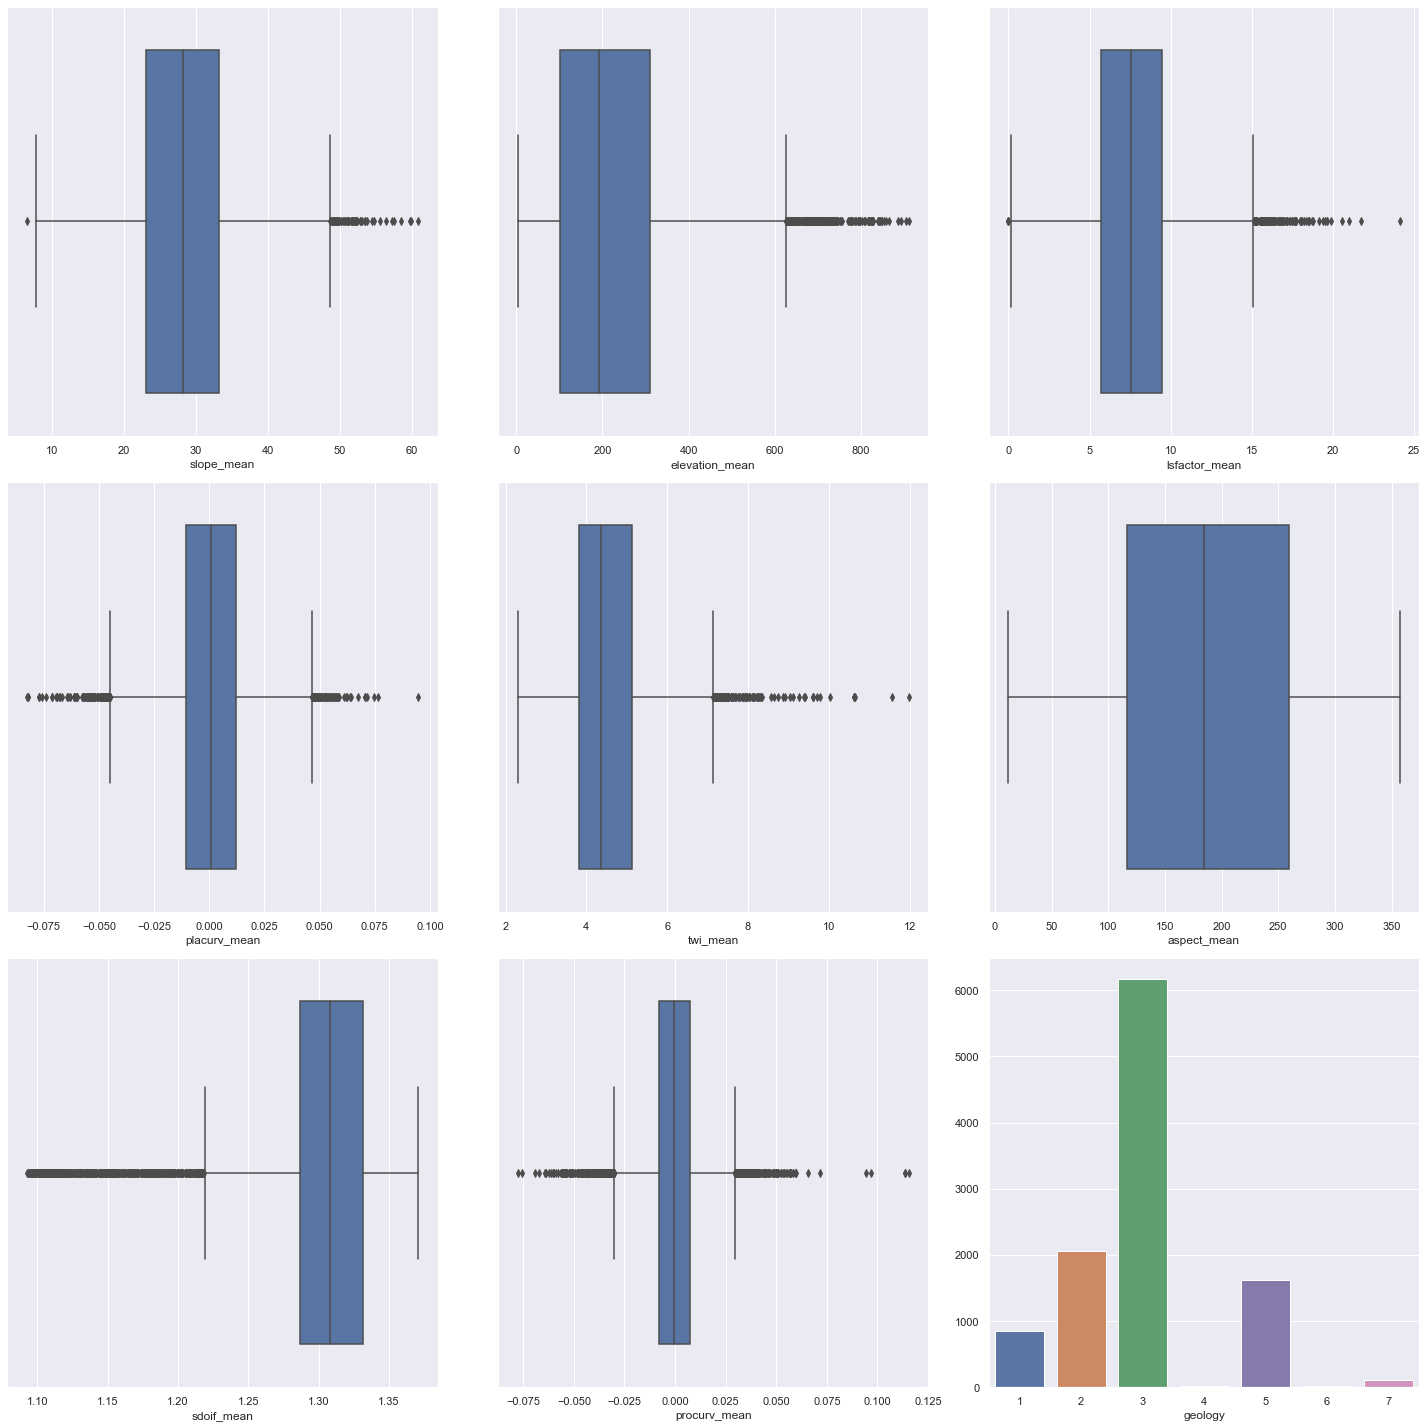

In [ ]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(means):
    plt.subplot(3, 3, (i+1))
    sns.boxplot(data=train, x=col)
    plt.ylabel("")
plt.subplot(3, 3, 9)
sns.countplot(data=train, x="geology")
plt.ylabel("")
plt.tight_layout()
plt.savefig("media/boxes.png")

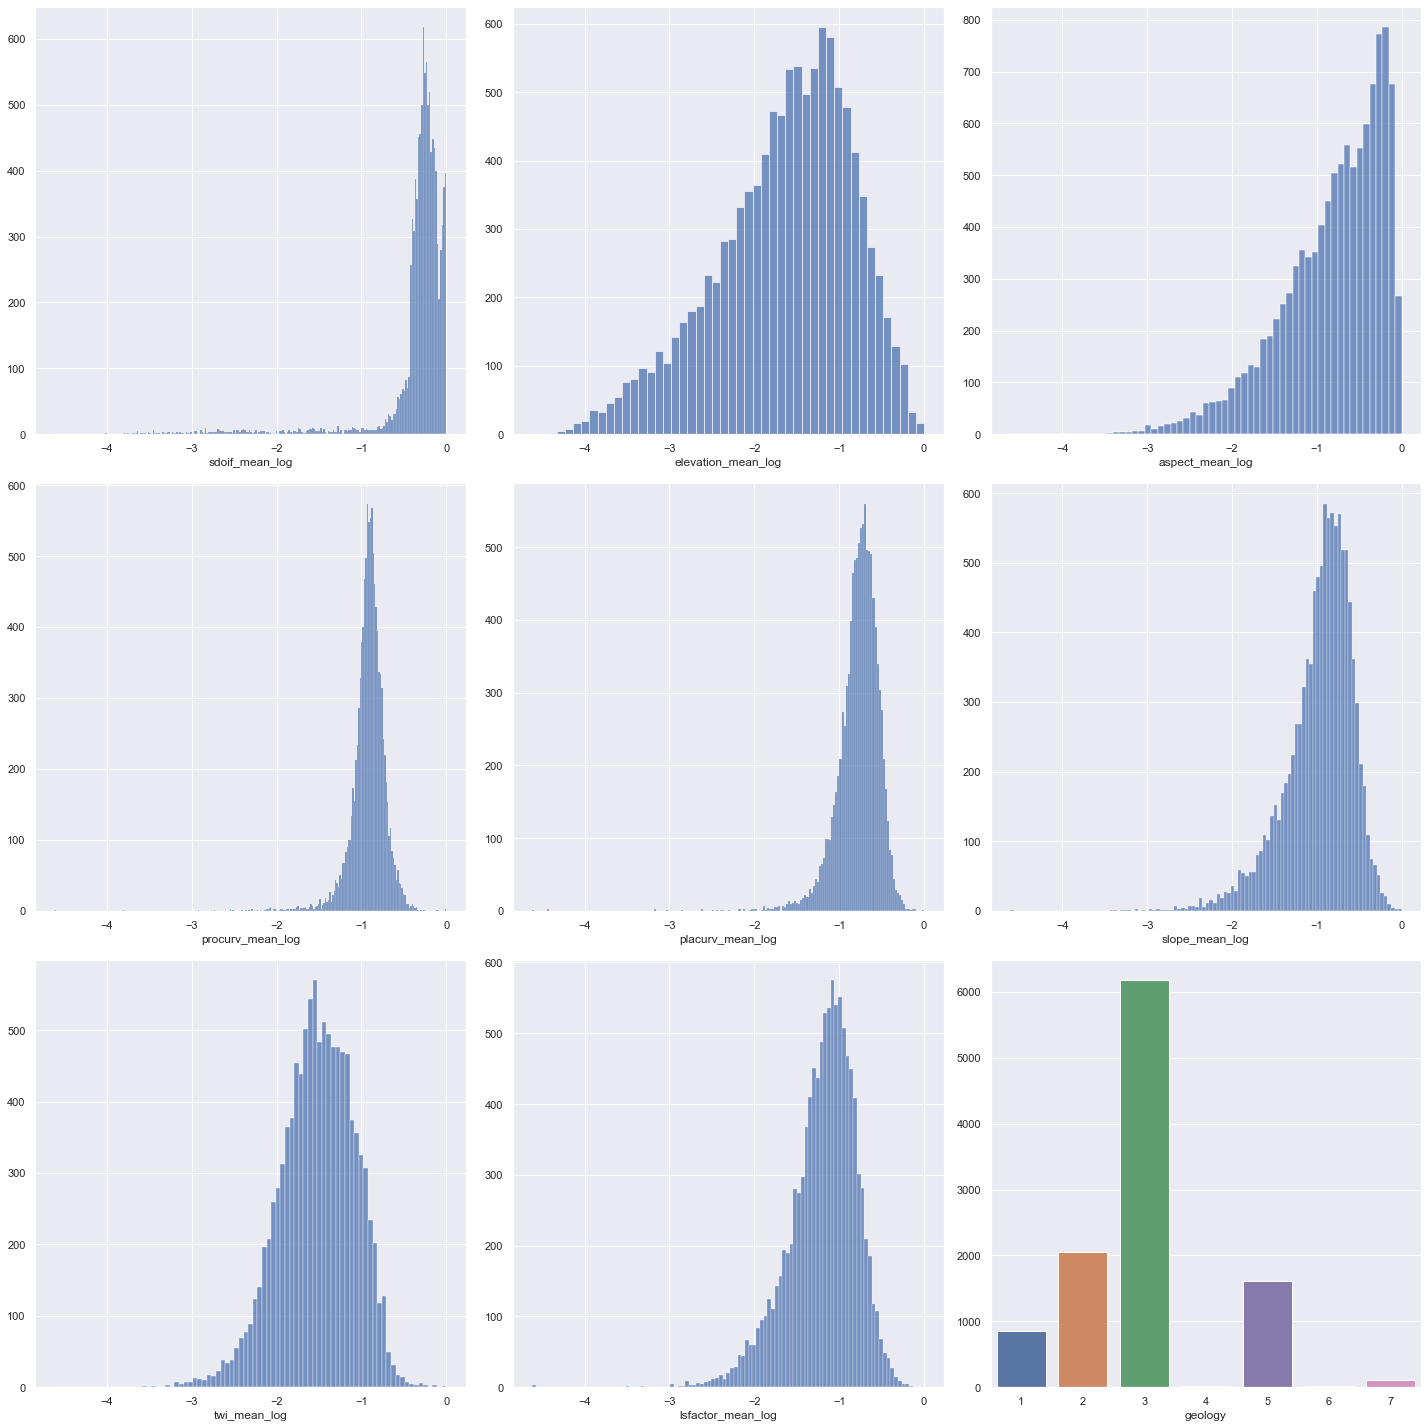

In [57]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(means):
    plt.subplot(3, 3, (i+1))
    sns.histplot(train[f"{col}_log"], label=f"log {col}")
    plt.ylabel("")
plt.subplot(3, 3, 9)
sns.countplot(data=train, x="geology")
plt.ylabel("")
plt.tight_layout()
plt.savefig("finn/media/distslog.png")

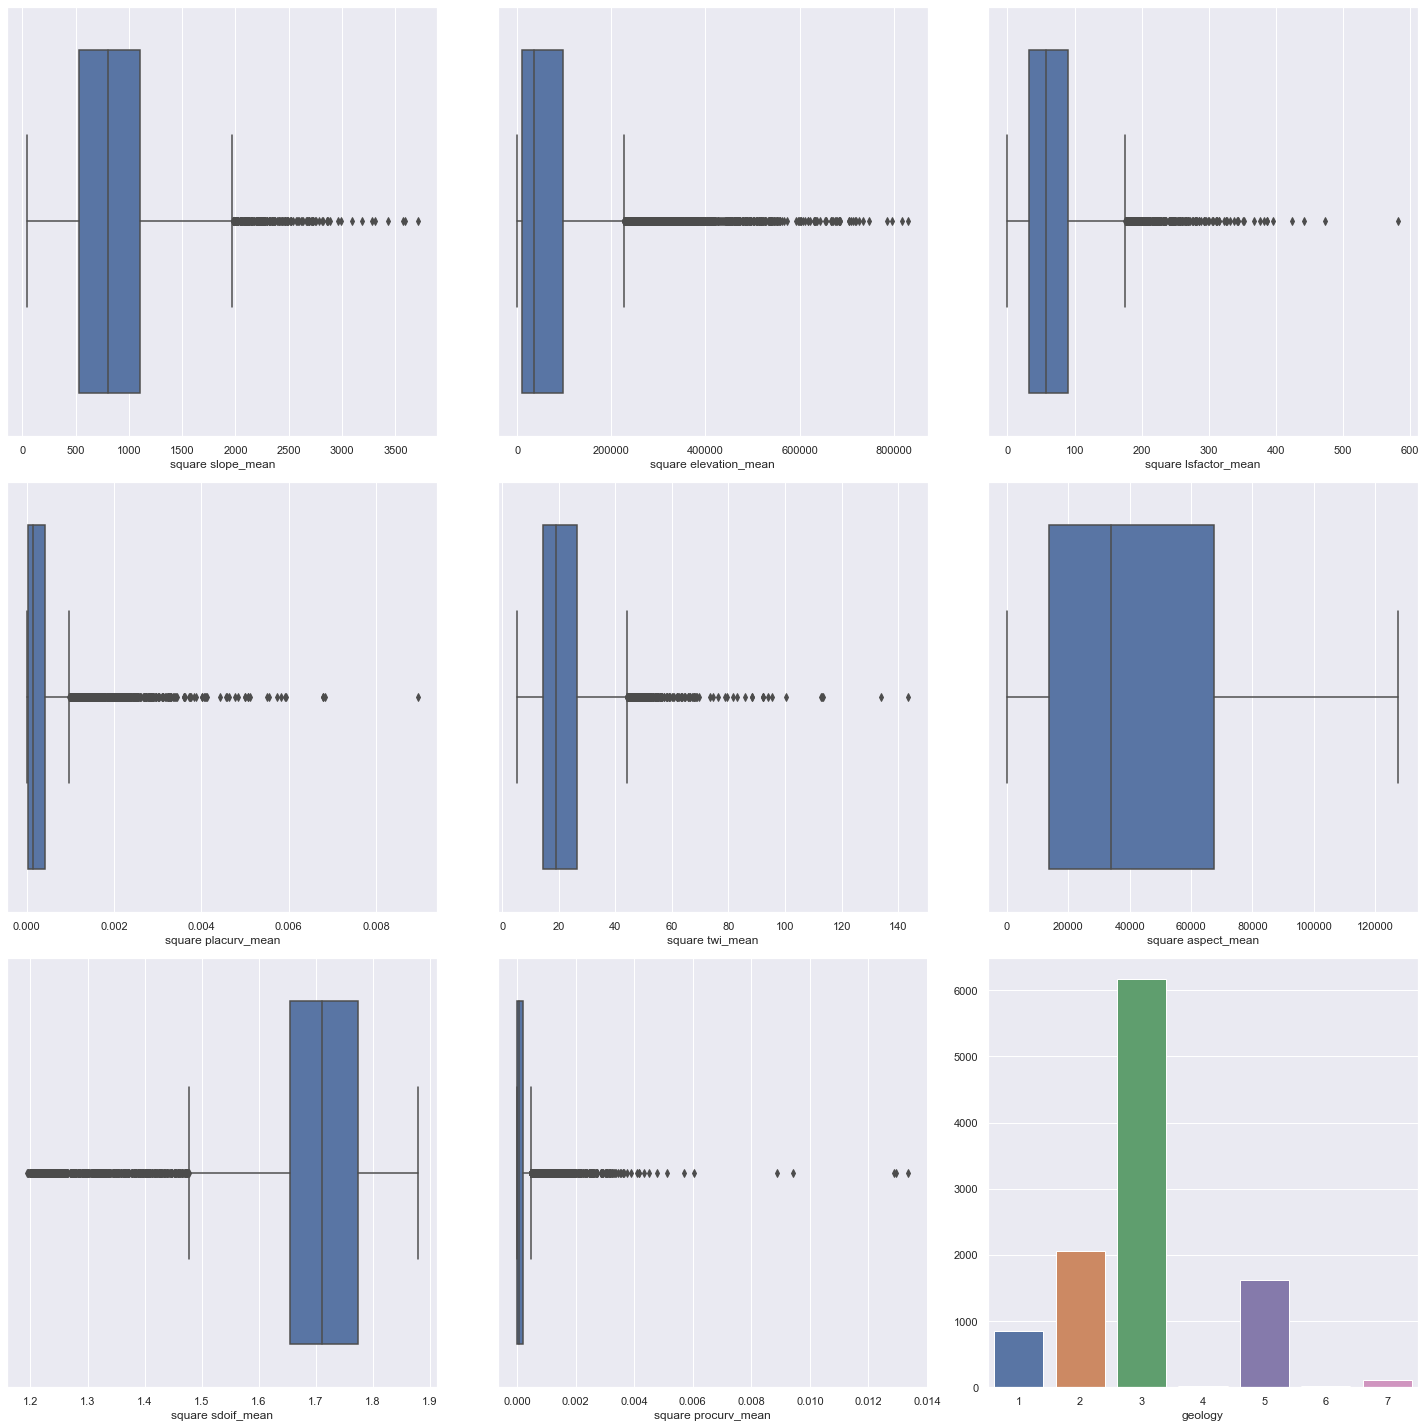

In [ ]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(means):
    plt.subplot(3, 3, (i+1))
    sns.boxplot(np.square(train[col]))
    plt.xlabel(f"square {col}")
    plt.ylabel("")
plt.subplot(3, 3, 9)
sns.countplot(data=train, x="geology")
plt.ylabel("")
plt.tight_layout()
plt.savefig("media/boxessquare.png")

In [ ]:
geos

['geology1',
 'geology2',
 'geology3',
 'geology4',
 'geology5',
 'geology6',
 'geology7']

In [56]:
reload(feat_trans)
fns = [np.array, np.log, np.square, np.sqrt]
fn_names = ['id', 'log','sq', 'sqrt']
test_cols = list(geos)
column_dict = dict(zip(range(len(test_cols)), geos))
i = len(test_cols)
for col in means + stds:
    for fn, name in zip(fns, fn_names):
        cn = f"{col}_{name}"
        column_dict[i] = cn
        i += 1
        #ss = StandardScaler().fit(train[[col]], y)
        #arr = fn(ss.transform(train[[col]]))
        if name == 'log':
            arr = fn(feat_trans.special_normalize(train, col))
        else:
            arr = fn(feat_trans.normalize(train, col))
        if np.isinf(arr).sum():
            print(cn)
        train[cn] = arr
        test_cols.append(cn)

<AxesSubplot:ylabel='Count'>

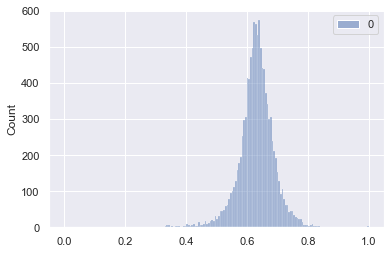

In [46]:

#sns.histplot(train["procurv_mean"]))
sns.histplot(np.sqrt(feat_trans.normalize(train, "procurv_mean")))

In [127]:
from sklearn.feature_selection import SelectKBest, SelectFpr, SelectFromModel
from sklearn.feature_selection import chi2
X, y = train[test_cols].to_numpy(), np.array(train["Label"])
X, y = SMOTE().fit_resample(X, y)
ss = StandardScaler().fit(X, y)
X = ss.transform(X)
X = X - X.min()

NameError: name 'SMOTE' is not defined

In [ ]:
X_kbest = SelectKBest(chi2, k=25).fit_transform(X, y)

### all transformed features:

In [ ]:
feat_trans.test_feats_svc(X, y)

0.7288298467308456

In [ ]:
X_base, y_base = train[original_columns].to_numpy(), train["Label"]
ss = StandardScaler().fit(X_base, y_base)
X_base = ss.transform(X_base)
X_base, y_base = SMOTE().fit_resample(X_base, y_base)
feat_trans.test_feats_svc(X_base, y_base)

0.761839448117582

### svm baseline original inputs:
f1 = 0.7609937405291228

In [ ]:
X_fpr = SelectFpr(chi2).fit_transform(X, y)
X_fpr.shape

(16296, 662)

In [ ]:
feat_trans.test_feats_svc(X_fpr, y)

0.68004021624465

In [ ]:
from sklearn.svm import LinearSVC

def svc_features(n):
    lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
    model = SelectFromModel(lsvc, prefit=True, max_features=n)
    #svc = SVC().fit(X, y)
    #model = SelectFromModel(svc, prefit=True)
    X_svc = model.transform(X)
    return feat_trans.test_feats_svc(X_svc, y)

print([svc_features(i) for i in [10, 25, 50, 100, None]])

[0.5554355457379503, 0.5484398798510427, 0.6156254137068214, 0.6292288258176536, 0.7226334961778834]


In [ ]:
reload(feat_trans)
from sklearn.ensemble import ExtraTreesClassifier
def tree_features(n):
    clf = ExtraTreesClassifier(n_estimators=50)
    clf = clf.fit(X, y)
    model = SelectFromModel(clf, prefit=True, max_features=n)
    X_clf = model.transform(X)
    return feat_trans.test_feats(ExtraTreesClassifier(n_estimators=50), X_clf, y)

In [ ]:
for n in [10, 25, 50, 100, None]:
    print(tree_features(n))

0.5956781704235005
0.6407556250975557
0.6485482272712267
0.7472764799088732
0.7764070317831667


In [ ]:
len(test_cols) - len(geos)


0

In [ ]:
from sklearn.svm import SVC
svc = SVC(random_state=42).fit(X, y)
model = SelectFromModel(svc, prefit=True)

X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

In [ ]:
len(train.columns)

540

In [83]:
reload(baseline)
X, y = baseline.baselineXy()
X.shape

(10864, 17)

In [95]:
feat_trans.test_feats(RandomForestClassifier(), *baseline.baselineXy(as_numpy=True))

0.6000710399630528

In [84]:
from sklearn.linear_model import LogisticRegression as LR
feat_trans.test_feats(LR(), *baseline.baselineXy(as_numpy=True))

0.430197086937478

<Figure size 1440x864 with 0 Axes>

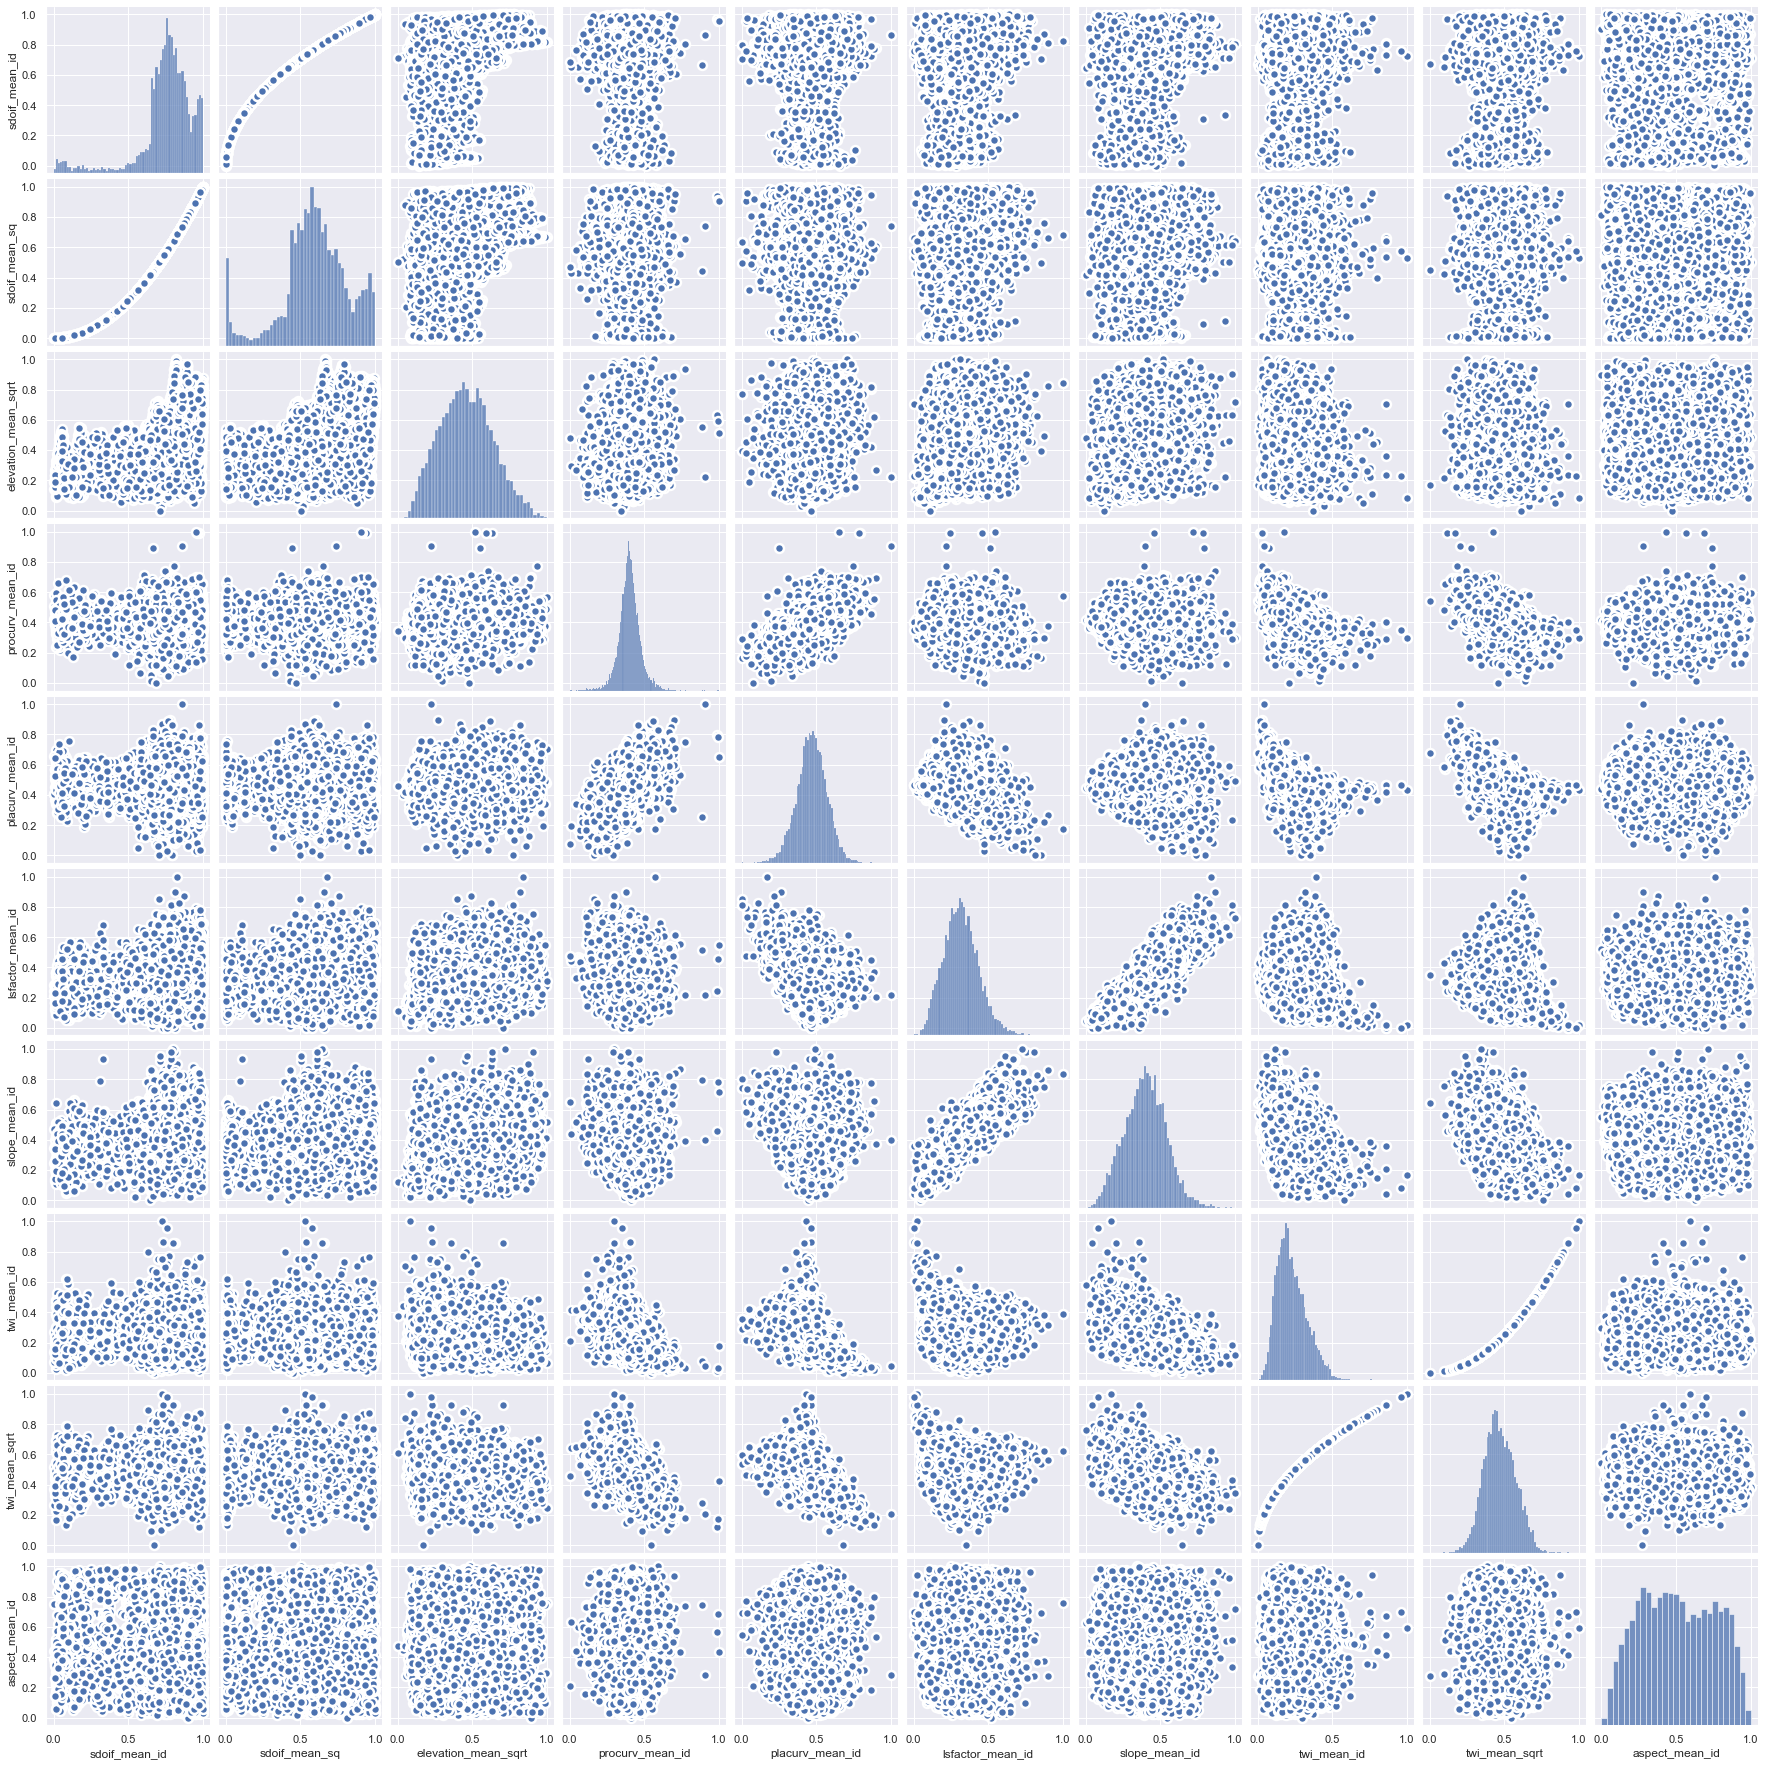

In [106]:
plt.figure(figsize = (20, 12))
sns.pairplot(pd.DataFrame(baseline.baselineXy()[0]).drop(geos, axis=1), kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [112]:
reload(baseline)
X, y = baseline.baselineXy()
feat_trans.test_feats(RandomForestClassifier(), X.to_numpy(), y)

0.597778571708758

In [119]:
from sklearn.preprocessing import QuantileTransformer, KBinsDiscretizer, Normalizer, PowerTransformer, RobustScaler, SplineTransformer, StandardScaler
trans = [QuantileTransformer, Normalizer, PowerTransformer, RobustScaler, SplineTransformer, StandardScaler]

trans_dict = {}
for col in X.drop(geos, axis=1).columns:
    best = None
    bestf1 = None
    for t in trans:
        Xt = pd.DataFrame(X)
        Xt['test'] = t().fit_transform(Xt[[col]])
        f1 = feat_trans.test_feats(RandomForestClassifier(), Xt.to_numpy(), y)
        if best is None or f1 > bestf1:
            best = t
            bestf1 = f1

    trans_dict[col] = best
    print(col, best.__name__, bestf1)

sdoif_mean_id QuantileTransformer 0.6074630590276194
sdoif_mean_sq RobustScaler 0.6055780704282095
elevation_mean_sqrt QuantileTransformer 0.6110679414901191
procurv_mean_id StandardScaler 0.6041136649637527
placurv_mean_id Normalizer 0.6016477682978153
lsfactor_mean_id Normalizer 0.6046898413853407
slope_mean_id RobustScaler 0.5996900581833243
twi_mean_id Normalizer 0.6020856755871495
twi_mean_sqrt QuantileTransformer 0.5977624713372603
aspect_mean_id QuantileTransformer 0.6082829013397074
test QuantileTransformer 0.6063053291899727


In [144]:
for col, t in trans_dict.items():
    Xbeast[col] = t().fit_transform(Xbeast[[col]])

feat_trans.test_feats(RandomForestClassifier(), Xbeast.to_numpy(), y)

0.5981784292340682

In [135]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50)
y = train["Label"]
clf = clf.fit(Xbeast, y)
model = SelectFromModel(clf, prefit=True)
X_clf = model.transform(Xbeast)
feat_trans.test_feats(ExtraTreesClassifier(n_estimators=50), X_clf, y)

0.558747652784032

In [145]:
Xs, ys = SMOTE().fit_resample(X_clf, y)
mod = ExtraTreesClassifier().fit(Xs, ys)
y_pred = mod.predict(X_clf)
f1_score(y, y_pred)

1.0

In [158]:
test = pd.read_csv("data/Test.csv")
test
reload(baseline)
X = baseline.testX()
for col, t in trans_dict.items():
    X[col] = t().fit_transform(X[[col]])
y_pred = mod.predict(model.transform(X))


### transformers:
- sdoif
    -  Quantile: 0.03

In [148]:
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [159]:
sub_file = pd.DataFrame({'Sample_ID': test.Sample_ID, 'Label': y_pred})
sub_file.to_csv('finn/extra.csv', index = False)
sub_file.head()

,Sample_ID,Label
0,10865,0
1,10866,0
2,10867,0
3,10868,1
4,10869,1


In [160]:
trans_dict

{'sdoif_mean_id': sklearn.preprocessing._data.QuantileTransformer,
 'sdoif_mean_sq': sklearn.preprocessing._data.RobustScaler,
 'elevation_mean_sqrt': sklearn.preprocessing._data.QuantileTransformer,
 'procurv_mean_id': sklearn.preprocessing._data.StandardScaler,
 'placurv_mean_id': sklearn.preprocessing._data.Normalizer,
 'lsfactor_mean_id': sklearn.preprocessing._data.Normalizer,
 'slope_mean_id': sklearn.preprocessing._data.RobustScaler,
 'twi_mean_id': sklearn.preprocessing._data.Normalizer,
 'twi_mean_sqrt': sklearn.preprocessing._data.QuantileTransformer,
 'aspect_mean_id': sklearn.preprocessing._data.QuantileTransformer}